# Στοιχεία Φοιτητή
***
***

|Όνομα|ΑΜ|
|-|-|
|Δημήτρης Κελέσης|03115037|

# <h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [32]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering
import warnings; warnings.simplefilter('ignore')

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [33]:
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

Παραπάνω κατασκευάσαμε τις συνθετικές τοπολογίες από την πρώτη εργαστηριακή άσκηση δίνοντας τα κατάλληλα ορίσματα και εξασφαλίζοντας ότι τα προκύπτοντα γραφήματα θα είναι πάντα συνδεδεμένα

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [34]:
#import football.gml from local file using nx.read_gml
football_graph = nx.read_gml('football.gml')

In [35]:
#check if football is directed
nx.is_directed(football_graph)

# Manual check for directed graph
# mm = np.array((nx.adjacency_matrix(football_graph)).todense())
# for i in range(len(mm)):
#     for j in range(len(mm)):
#         if(mm[i][j] != mm[j][i]):
#             print('Directed')

False

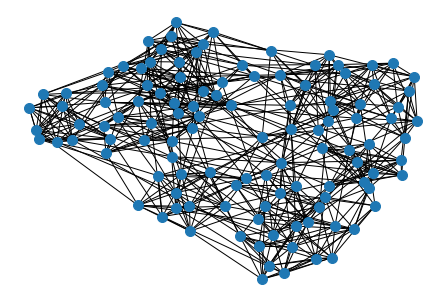

In [36]:
#visualize football
nx.draw(football_graph, node_size = 100)
# Using draw_networkx uses node names and its difficult to see the graph

In [37]:
#import lesmis.gml
lesmis_graph = nx.read_gml('lesmis.gml')

In [38]:
#check if lesmis is directed
nx.is_directed(lesmis_graph)

False

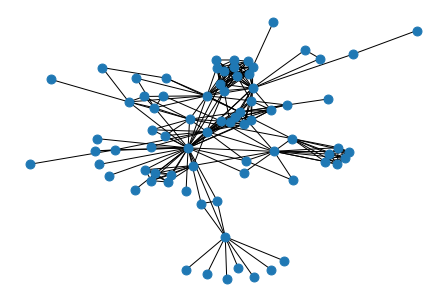

In [39]:
#visualize lesmis
nx.draw(lesmis_graph, node_size = 80)

In [40]:
#import dolphins.gml
dolphins_graph = nx.read_gml('dolphins.gml')

In [41]:
#check if dolphins is directed
nx.is_directed(dolphins_graph)

False

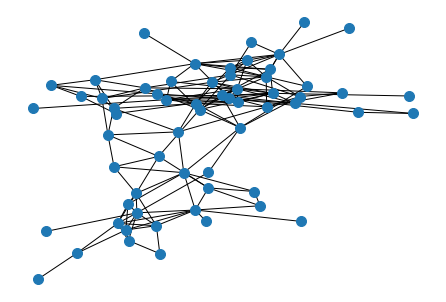

In [42]:
#visualize dolphins
nx.draw(dolphins_graph, node_size = 100)

Για τα πραγματικά γραφήματα διαβάσαμε το αντίστοιχο αρχείο .gml που περιείχε τις πληροφορίες σχετικά με τις ακμές και τις κορυφές που υπάρχουν στα γραφήματα. Δεν περιέχονται πληροφορίες σχετικά με τις θέσεις των κορυφών. Στα γραφήματα αυτά υπήρχαν ετικέτες πάνω στους κόμβους και συνεπώς η παρουσίαση τους με χρήση της συνάρτησης draw_networkx χρησιμοποιούσε και τα ονόματα των κορυφών με αποτέλεσμα να κάνει δύσκολη ή και σε κάποια γραφήματα αδύνατη την παρατήρηση της τοπολογίας τους λόγω του όγκου του κειμένου. Με την συνάρτηση που χρησιμοποιήσαμε δεν εμφανίζονται τα ονόματα για να μπορέσουμε να έχουμε καλύτερη οπτική επαφή. <br>
Επίσης για τον έλεγχο σχετικά με κατευθυνόμενο ή μη γράφημα χρησιμοποιήσαμε την έτοιμη συνάρτηση is_directed. Για λόγους πληρότητας υπάρχει ως comment out και ο παραδοσιακός τρόπος για να ελέγξουμε αν ένα γράφημα είναι κατευθυνόμενο μέσω του πίνακα γειτνίασης. Παίρνουμε αυτόν τον πίνακα από το εκάστοτε γράφημα και για κάθε στοιχείο του ελέγχουμε αν ισχύει α[i][j] = a[j][i] σε αντίθετη περίπτωση το γράφημα είναι κατευθυνόμενο.  

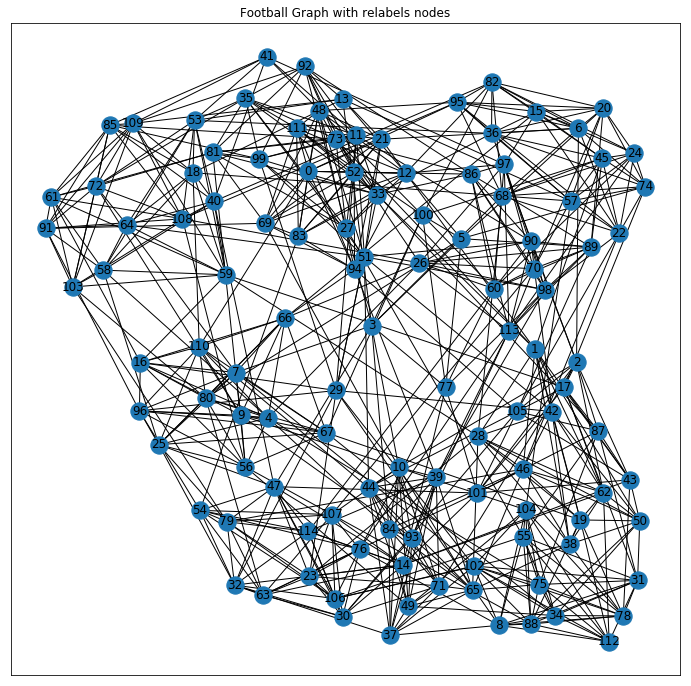

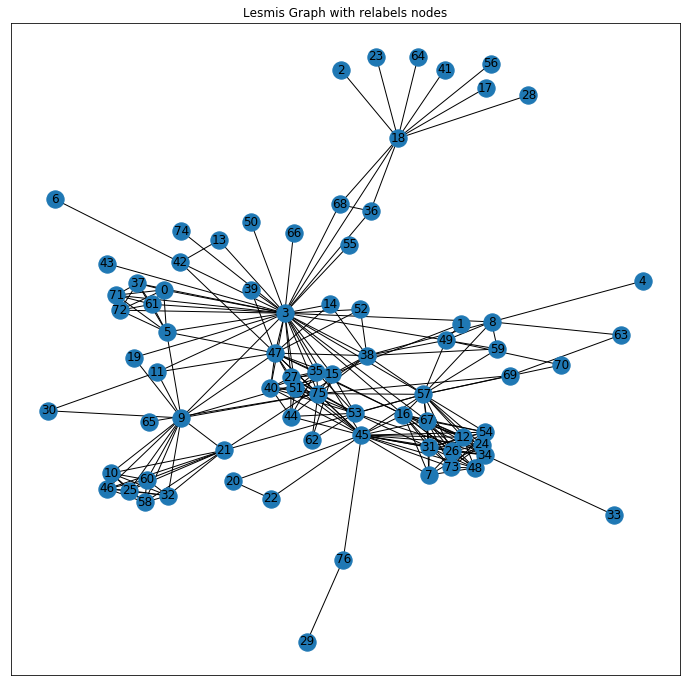

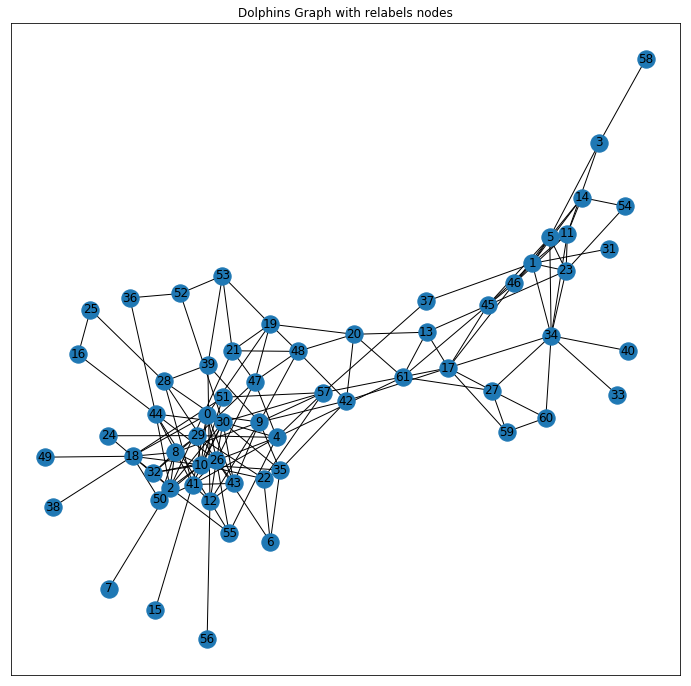

In [43]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    G_mapping = {v: k for k, v in G_mapping.items()}
    return nG,G_mapping

# There exists already made function nx.convert_node_labels_to_integers that does the same thing more compact

nfootball,football_map=conv2int(football_graph,0)
nlesmis, lesmis_map=conv2int(lesmis_graph,0)
ndolphins, dolphins_map=conv2int(dolphins_graph,0)

#G=nx.relabel_nodes(nG,G_mapping)
new_football = nx.relabel_nodes(nfootball, football_map)
new_lesmis = nx.relabel_nodes(nlesmis, lesmis_map)
new_dolphins = nx.relabel_nodes(ndolphins, dolphins_map)

#nx.draw_networkx(nx.convert_node_labels_to_integers(football_graph))
plt.figure(1, figsize=(12,12))
plt.title('Football Graph with relabels nodes')
nx.draw_networkx(new_football)
plt.figure(2, figsize=(12,12))
plt.title('Lesmis Graph with relabels nodes')
nx.draw_networkx(new_lesmis)
plt.figure(3, figsize=(12,12))
plt.title('Dolphins Graph with relabels nodes')
nx.draw_networkx(new_dolphins)


Όπως παρατηρήσαμε στο προηγούμενο βήμα η εμφάνιση των ονομάτων των κόμβων κάνει αδύνατη την ουσιαστική αναπαράσταση του γραφήματος. Για τον λόγο αυτό αν θέλουμε να ξέρουμε τα ονόματα τους καθώς μας προσφέρουν ουσιαστική πληροφορία ή και γιατί θέλουμε ο κάθε κόμβος να έχει την δικιά του ταυτότητα, εδώ π.χ. κάθε ομάδα, κάθε δελφίνι και κάθε χαρακτήρας είναι διαφορετικός από τους υπόλοιπους, θα πρέπει να τα ενσωματώσουμε στο γραφήμα με μορφή τέτοια ώστε να μην εμποδίζει την οπτικοποίηση. Για να το καταφέρουμε αυτό θα πρέπει να φτιάξουμε ένα λεξικό που θα αντιστοιχεί κάθε ονομασία κόμβου με έναν μοναδικό αριθμό. Εδώ χρησιμοποιούμε αύξοντες αριθμούς για κάθε κόμβο που συναντάμε. Στη συνέχεια πραγματοποιούμε επαναονομασία των κόμβων καταλλήλως. Πέραν της συνάρτησης που δίδεται για τον σκοπό αυτό υπάρχει ήδη η έτοιμη συνάρτηση convert_node_labels_to_integers η οποία πραγματοποιεί την ίδια λειτουργία συντομότερα και κρύβει μέρος της πολυπλοκότητας καθώς πραγματοποιεί και το renaming ταυτόχρονα επιστρέφοντας μας ένα αντίγραφο του γραφήματος έχοντας δώσει τα κατάλληλα νέα ονόματα στους κόμβους.

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

REG mean degree is:  4.0
RGER mean degree is:  4.0
RGG mean degree is:  10.670588235294117
SW mean degree is:  4.0
SF mean degree is:  7.811764705882353
Football mean degree is:  10.660869565217391
Lesmis mean degree is:  6.597402597402597
Dolphins mean degree is:  5.129032258064516


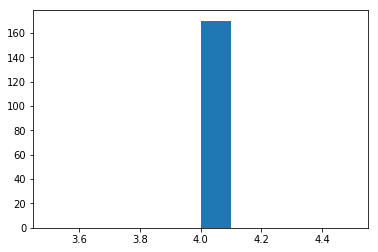

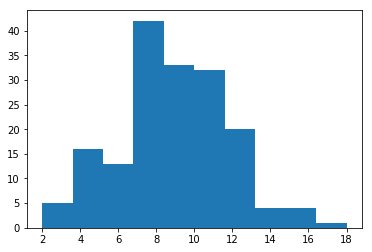

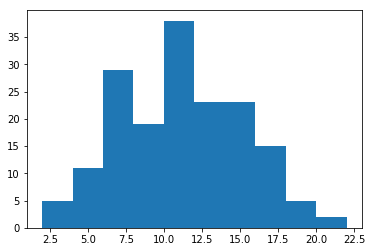

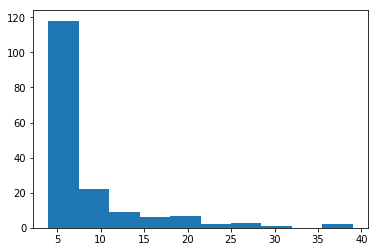

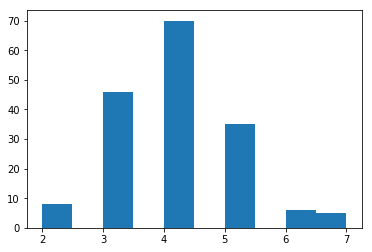

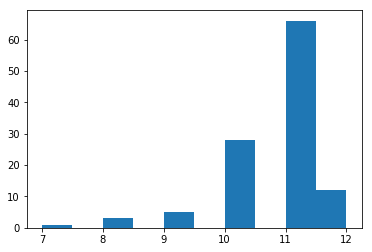

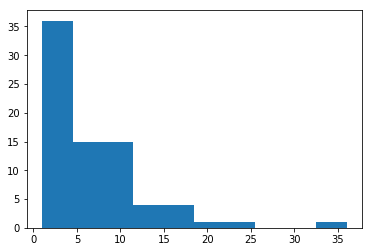

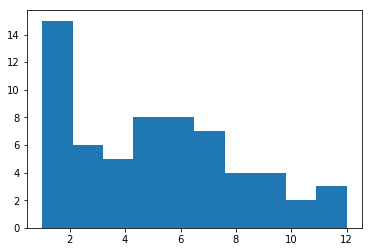

In [44]:
def find_degree(G):
    return dict(G.degree())

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(new_football)
lesmis_degree = find_degree(new_lesmis)
dolphins_degree = find_degree(new_dolphins)

def degree_hist(G_degree, index):
    plt.figure(index)
    plt.hist(list(G_degree.values()))#, width = 1)

all_graphs = [REG_degree, RGER_degree, RGG_degree, SF_degree, SW_degree, football_degree, lesmis_degree, dolphins_degree]   

for i in range(len(all_graphs)):
    degree_hist(all_graphs[i], i)

meaner = lambda a: np.mean(list(a.values()))

mean_degree_REG = meaner(REG_degree)
mean_degree_RGER = meaner(REG_degree)
mean_degree_RGG = meaner(RGG_degree)
mean_degree_SW = meaner(SW_degree)
mean_degree_SF = meaner(SF_degree)
mean_degree_football = meaner(football_degree)
mean_degree_lesmis = meaner(lesmis_degree)
mean_degree_dolphins = meaner(dolphins_degree)

print('REG mean degree is: ', mean_degree_REG)
print('RGER mean degree is: ', mean_degree_RGER)
print('RGG mean degree is: ', mean_degree_RGG)
print('SW mean degree is: ', mean_degree_SW)
print('SF mean degree is: ', mean_degree_SF)
print('Football mean degree is: ', mean_degree_football)
print('Lesmis mean degree is: ', mean_degree_lesmis)
print('Dolphins mean degree is: ', mean_degree_dolphins)

Θα σχολιάσουμε μόνο τις ομοιότητες μεταξύ των πραγματικών γραφημάτων και των συνθετικών, αν υπάρχουν, καθώς ομοιότητες και διαφορές μεταξύ των συνθετικών γραφημάτων εξετάστηκαν στην πρώτη εργαστηριακή. <br>

Παρατηρούμε ότι το γράφημα του ποδοσφαίρου έχει ουσιαστικά τον ίδιο μέσο βαθμό με το RGG υποδηλώνοντας ότι η φύση του πιθανώς να είναι ίδια με το τυχαίο γεωμετρικό γράφημα. <br>

Το γράφημα από το βιβλίο 'Οι Άθλιοι' ομοιάζει με τα SF γραφήματα και αυτό συμφωνεί με την υπάρχουσα βιβλιογραφία που θέλει το συγκεκριμένο γράφημα να αποτελεί χαρακτηριστικό παράδειγμα scale free δικτύου. <br>

Τέλος το γράφημα των δελφινιών θα λέγαμε ότι περισσότερο μοιάζει με γράφημα SW που ίσως μπορούμε να το ερμηνεύσουμ φυσικά καθώς η ιδιότητα του μικρού κόμσου συναντάται σε κοινότητες φυσικά σχηματισμένες όπως αυτή των δελφινιών.

<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

REG mean clustering coefficient is:  0.5
RGER mean clustering coefficient is:  0.053632127196141036
RGG mean clustering coefficient is:  0.6644645321593965
SW mean clustering coefficient is:  0.1843137254901961
SF mean clustering coefficient is:  0.12526374961413964
Football mean clustering coefficient is:  0.40321601104209803
Lesmis mean clustering coefficient is:  0.5731367499320134
Dolphins mean clustering coefficient is:  0.2589582460550202


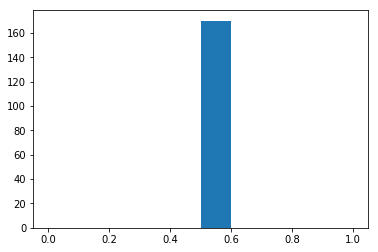

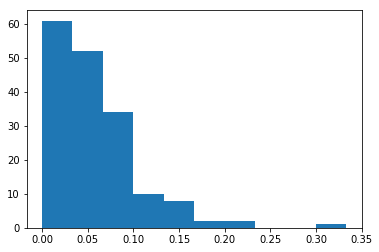

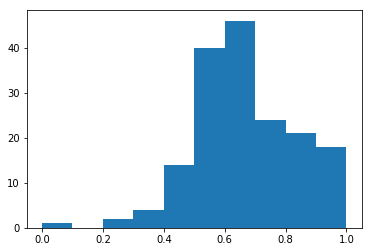

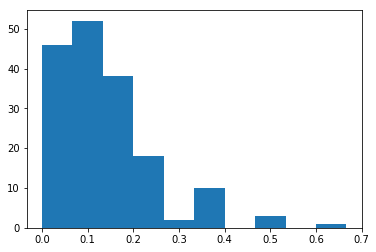

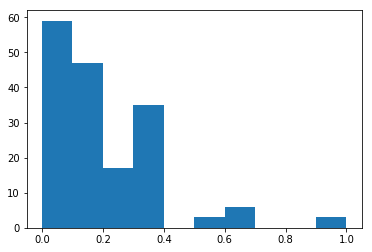

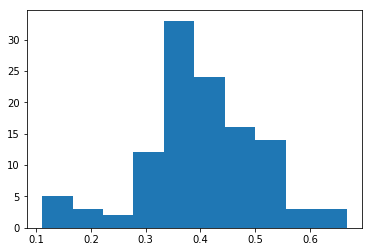

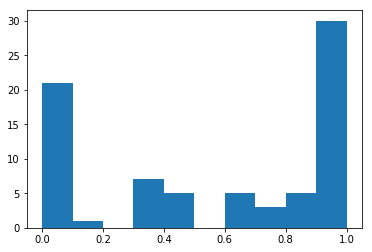

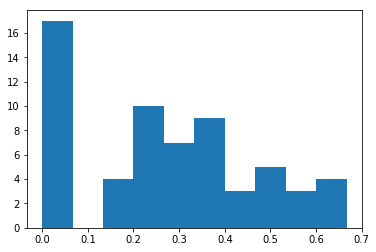

In [45]:
def clust_coef(G):
    return nx.clustering(G)

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc = clust_coef(new_football)
lesmis_cc = clust_coef(new_lesmis)
dolphins_cc = clust_coef(new_dolphins)

def cc_hist(G_cc, index):
    plt.figure(index)
    plt.hist(list(G_cc.values()))
    
all_graphs_cc = [REG_cc, RGER_cc, RGG_cc, SF_cc, SW_cc, football_cc, lesmis_cc, dolphins_cc]   

for i in range(len(all_graphs_cc)):
    degree_hist(all_graphs_cc[i], i)

meaner = lambda a: np.mean(list(a.values()))


mean_cc_REG = meaner(REG_cc)
mean_cc_RGER = meaner(RGER_cc)
mean_cc_RGG = meaner(RGG_cc)
mean_cc_SW = meaner(SW_cc)
mean_cc_SF = meaner(SF_cc)
mean_cc_football = meaner(football_cc)
mean_cc_lesmis = meaner(lesmis_cc)
mean_cc_dolphins = meaner(dolphins_cc)

print('REG mean clustering coefficient is: ', mean_cc_REG)
print('RGER mean clustering coefficient is: ', mean_cc_RGER)
print('RGG mean clustering coefficient is: ', mean_cc_RGG)
print('SW mean clustering coefficient is: ', mean_cc_SW)
print('SF mean clustering coefficient is: ', mean_cc_SF)
print('Football mean clustering coefficient is: ', mean_cc_football)
print('Lesmis mean clustering coefficient is: ', mean_cc_lesmis)
print('Dolphins mean clustering coefficient is: ', mean_cc_dolphins)

Θα σχολιάσουμε μόνο τις ομοιότητες μεταξύ των πραγματικών γραφημάτων και των συνθετικών, αν υπάρχουν, καθώς ομοιότητες και διαφορές μεταξύ των συνθετικών γραφημάτων εξετάστηκαν στην πρώτη εργαστηριακή. <br>

Παρατηρούμε ότι το γράφημα του ποδοσφαίρου μοιάζει με το REG σχετικά με τον συντελεστή ομαδοποίησης, Κάτι που διαφέρει σε σχέση με την προηγούμενη παρατήρηση μας που έμοιαζε με τυχαίο γεωμετρικό γράφημα. <br>

Το γράφημα από το βιβλίο 'Οι Άθλιοι' ομοιάζει με τα RGG και REG γραφήματα σε ότι αφορά τον συντελεστή ομαδοποίησης. Αυτό δεν συμφωνεί σε μεγάλο βαθμό με την υπάρχουσα βιβλιογραφία που θέλει το συγκεκριμένο γράφημα να αποτελεί χαρακτηριστικό παράδειγμα scale free δικτύου. <br>

Τέλος το γράφημα των δελφινιών θα λέγαμε ότι περισσότερο μοιάζει και πάλι σχετικά με τον συντελεστή ομαδοποίησης με γράφημα SW που ίσως μπορούμε να το ερμηνεύσουμ φυσικά καθώς η ιδιότητα του μικρού κόμσου συναντάται σε κοινότητες φυσικά σχηματισμένες όπως αυτή των δελφινιών.

<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

REG mean ego-betweenness centrality is:  1.0
RGER mean ego-betweenness centrality is:  18.08529411764706
RGG mean ego-betweenness centrality is:  4.31735644257703
SW mean ego-betweenness centrality is:  2.6882352941176473
SF mean ego-betweenness centrality is:  19.012156862745098
Football mean ego-betweenness centrality is:  12.36106625258799
Lesmis mean ego-betweenness centrality is:  6.659230055658625
Dolphins mean ego-betweenness centrality is:  4.258736559139784


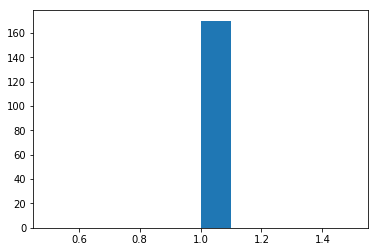

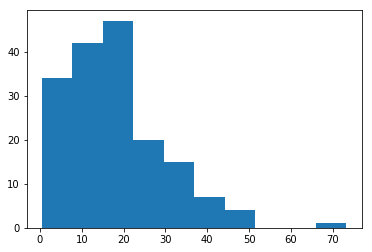

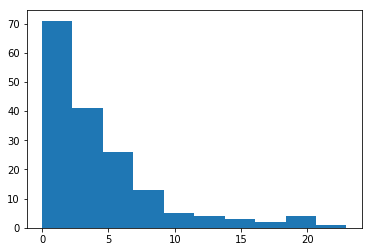

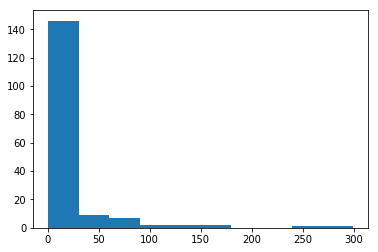

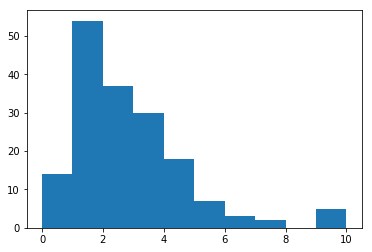

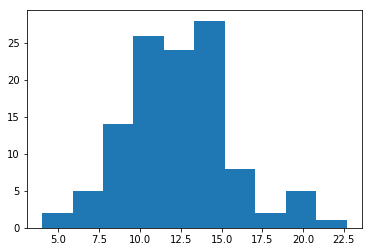

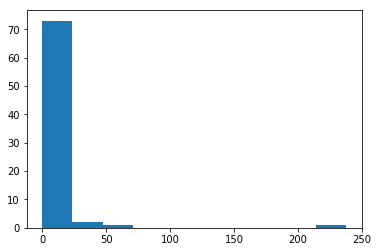

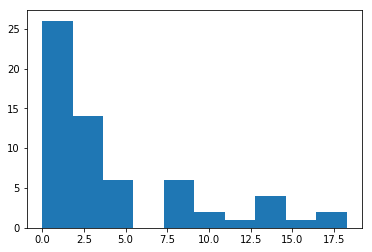

In [46]:
def ego_centrality(G):
    result = []
    for i in range(len(G.nodes)):
        ego = nx.ego_graph(G,i)
        adj_mat = (nx.adjacency_matrix(ego)).todense()
        #print(adj_mat)
        hadamard_product = np.multiply(np.linalg.matrix_power(adj_mat, 2), (1 - adj_mat))
        #print(hadamard_product)
        up_triangular = np.triu(hadamard_product, 1)
        #print(up_triangular)
        non_zero = list(up_triangular[np.nonzero(up_triangular)])
        #print(non_zero)
        half_sum_of_recipr = sum(1/i for i in non_zero) / 2
        result.append(half_sum_of_recipr)
    return result


REG_ebtw = ego_centrality(REG) 
RGER_ebtw = ego_centrality(RGER)
RGG_ebtw = ego_centrality(RGG)
SF_ebtw = ego_centrality(SF)
SW_ebtw = ego_centrality(SW)
nfootball_ebtw = ego_centrality(new_football)
nlesmis_ebtw = ego_centrality(new_lesmis)
ndolphins_ebtw = ego_centrality(new_dolphins)

def egobtw_hist(G_ebtw, index): 
    plt.figure(index)
    plt.hist(list(G_ebtw))
    
all_graphs_ebtw = [REG_ebtw, RGER_ebtw, RGG_ebtw, SF_ebtw, SW_ebtw, nfootball_ebtw, nlesmis_ebtw, ndolphins_ebtw]   

for i in range(len(all_graphs_ebtw)):
    egobtw_hist(all_graphs_ebtw[i], i)

meaner = lambda a: np.mean(list(a))


mean_ebtw_REG = meaner(REG_ebtw)
mean_ebtw_RGER = meaner(RGER_ebtw)
mean_ebtw_RGG = meaner(RGG_ebtw)
mean_ebtw_SW = meaner(SW_ebtw)
mean_ebtw_SF = meaner(SF_ebtw)
mean_ebtw_football = meaner(nfootball_ebtw)
mean_ebtw_lesmis = meaner(nlesmis_ebtw)
mean_ebtw_dolphins = meaner(ndolphins_ebtw)

print('REG mean ego-betweenness centrality is: ', mean_ebtw_REG)
print('RGER mean ego-betweenness centrality is: ', mean_ebtw_RGER)
print('RGG mean ego-betweenness centrality is: ', mean_ebtw_RGG)
print('SW mean ego-betweenness centrality is: ', mean_ebtw_SW)
print('SF mean ego-betweenness centrality is: ', mean_ebtw_SF)
print('Football mean ego-betweenness centrality is: ', mean_ebtw_football)
print('Lesmis mean ego-betweenness centrality is: ', mean_ebtw_lesmis)
print('Dolphins mean ego-betweenness centrality is: ', mean_ebtw_dolphins)

Θα σχολιάσουμε μόνο τις ομοιότητες μεταξύ των πραγματικών γραφημάτων και των συνθετικών, αν υπάρχουν, καθώς ομοιότητες και διαφορές μεταξύ των συνθετικών γραφημάτων εξετάστηκαν στην πρώτη εργαστηριακή. <br>

Παρατηρούμε ότι και τα τρία γραφήματα δεν ομοιάζουν σε σημαντικό βαθμό σχετικά με την εγωκεντρικότητα με τα συνθετικά γραφήματα υποδεικνύοντας πως αυτή η μετρική ίσως να μην χαρακτηρίζει σε μεγάλο βαθμό τα γραφήματα ώστε γραφήματα παρόμοιας τοπολογίας να έχουν όμοιες εγωκεντρικότητες.  <br>

Ίσως θα μπορούσε να παρατηρήσει κανείς ότι το γράφημα των δεφλινιών μοιάζει με το RGG σχετικά με αυτή τη μετρική. Τα υπόλοιπα εμφανίζουν σημαντικές αποκλίσεις από όλα τα συνθετικά δίκτυα.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση networkx.algorithms.community.quality.modularity.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [47]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [48]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.modularity to measure modularity
import itertools
from operator import itemgetter

def comd_GN(G,k):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: 0 < len(c) <= k, comp)
    result = []
    for communities in limited:
        all_com = (tuple(sorted(c) for c in communities))
        modularity = nx.algorithms.community.quality.modularity(G, all_com)
        result.append([modularity, all_com])
    return(max(result, key = itemgetter(0)))

#com = comd_GN(RGG, 50)[1]
#print(tuple(sorted(c) for c in com))

Υλοποιούμε τον εντοπισμό κοινοτήτων με χρήση του αλγορίθμου Girvan - Newman. Για να το πραγματοποιήσει αυτό ο αλγόριθμος αφαιρεί ακμές από το αρχικό γράφημα. Τα συνδεδεμένα τμήματα του οποίου που παραμένουν αποτελούν της ζητούμενες κοινότητες. Ο αλγόριθμος πραγματοποιεί με συγκεκριμένο τρόπο την αφαίρεση ακμών, επιλέγει και αφαιρεί ακμές που υπάρχουν μεταξύ των κοινοτήτων ώστε να καταλήξει σε αρτιότερα αποτελέσματα σχετικά με τις κοινότητες. Ορίζουμε ως betweenness  της κάθε ακμής το πλήθος των συντομότερων μονοπατιών που περνούν από την ακμή αυτή.Ο αλγόριθμος λειτουργεί ως εξής: <br>

1. Υπολογίζει την betweenness όλων των υπαρχουσών ακμών στο γράφημα.
2. Η/Οι ακμή/ες με την/τις μεγαλύτερη/ες betweenness αφαιρούνται. 
3. Υπολογίζεται εκ νέου το betweenness όσων ακμών επηρεάστηκαν από την παραπάνω αφαίρεση.
4. Επαναλαμβάνω τα παραπάνω μέχρις ότου δεν υπάρχουν άλλες ακμές.

Τα παραπάνω οδηγούν στη δημιουργία ενός δενδροδιαγράμματος από το οποίο με χρήση του modularity επιλέγεται ο καλύτερος διαχωρισμός σε κοινότητες φέρνοντας στο κατάλληλο επίπεδο του δέντρου την οριζόντια τομή του σε επιμέρους κοινότητες.

<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [49]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.modularity to measure modularity
from sklearn.cluster import SpectralClustering
from collections import defaultdict
import itertools
from operator import itemgetter

def make_node_labels_to_dict(node_labels): # after creating zip of node and labels we need to make it as a dict in order to get the cluster
    d = defaultdict(list)
    for k, *v in node_labels:
        d[k].append(v)
    return d

def dict_to_community(d): # from given dictionary return list of tuples of communities
    communities = []
    for k, v in d.items():
        val = ([item for sublist in v for item in sublist]) # simplify multilists into one single list
        communities.append(val)
    return communities
    
def comd_SP(G,k):
    adja_matrix = nx.adjacency_matrix(G)
    result = []
    for i in range(1, k):
        clustering = SpectralClustering(n_clusters = i, assign_labels = 'discretize').fit(adja_matrix)
        #print(clustering.labels_)
        nodes_and_labels = zip(clustering.labels_, [i for i in range(list(G.nodes)[-1] + 1)])
        nodes_and_labels = make_node_labels_to_dict(nodes_and_labels)
        all_com = dict_to_community(nodes_and_labels)
        modularity = nx.algorithms.community.quality.modularity(G, all_com)
        result.append([modularity, all_com])
    return(max(result, key = itemgetter(0)))

        
#com = comd_SP(REG, 50)[1]
#print(tuple(sorted(c) for c in com))

Για Spectral clustering χρησιμοποιούμε την αντίστοιχη συνάρτηση από το sklearn. Η συνάρτηση αυτή τροποποιεί καταλλήλως τις ετικέτες του κάθε κόμβου σχετικά με την κοινότητα στην οποία αυτός ανήκει λαμβάνοντας υπόψη τον πίνακα γειτνίασης. Για να λειτουργήσει χρειάζεται ο πίνακας γειτνίασης και από αυτόν υπολογίζουμε το clustering για το ζητούμενο γράφημα. Στη συνέχεια χρειαζόμαστε να έχουμε πρόσβαση στις πληροφορίες που μας δίνει η συνάρτηση. Τα clustering labels μας δίνουν την κοινότητα στην οποία θα ανήκει ο κάθε κόμβος. Στη συνέχεια χρησιμοποιώντας κάποιες άλλες συναρτήσεις που δημιουργήσαμε κατασκευάζουμε αρχεία ομαδοποίησης των κοινοτήτων σε μορφή λεξικού και αυτά τα μετατρέπουμε σε μορφή κοινότητας σύμφωνα με αυτή που δέχεται η συνάρτηση υπολογισμού του modularity. Εν τέλει μετά από διάφορες μετατροπές των αρχείων εξόδου υπολογίζουμε τα ζητούμενα σε μορφή αντίστοιχη με την προηγούμενη μέθοδο clustering.

<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [50]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.modularity to measure modularity

def comd_MM(G):
    all_com = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
    modularity = nx.algorithms.community.quality.modularity(G, all_com)
    
    return([modularity, all_com])


#print(tuple(sorted(c) for c in comd_MM(REG)[1])) 

Η συγκεκριμένη συνάρτηση εύρεσης κοινοτήτων δρα άπληστα. Χρησιμοποιεί τον αλγόριθμο Clauset-Newman-Moore greedy modularity maximization. Ο αλγόριθμος ξεκινά θεωρώντας κάθε κόμβο μία κοινότητα μόνο του και στη συνέχεις ενώνει κοινότητες μεταξύ τους με κρητίριο την ένοση κοινοτήτων που αυξάνουν το modularity μέχρις ότους φτάσει στο αρχικό γράφημα που θα είναι μία μοναδική κοινότητα. Επιστρέφει τον διαχωρισμό με το μέγιστο modularity.

<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [51]:
def visual_com(G, communities, index, titler, node_pos):
    node_list = []
    color_node = []
    for i in range(len(communities)): # create pairs of nodes and their color in order to draw them. 
#Use communities to parse nodes and for every community use same color for the nodes belong to the same community
        cur_color = colors[i + 100]
        for j in communities[i]:
            node_list.append(j)
            color_node.append(cur_color)
    plt.figure(index, figsize = (12,12))
    plt.title(titler)
    #node_pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos = node_pos, nodelist = node_list, node_color = color_node, node_size = 90)
    nx.draw_networkx_edges(G,pos = node_pos)
#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges

#visual_com(RGG, com, 1)

Συνάρτηση η οποία λαμανει υπόψη τις διαχωρισμένες κοινότητες, το γράφημα και το είδος αυτού και στην συνέχεια σχεδιάζει στον χώρο το γράφημα με τις κοινότητες αυτού χρωματισμένες διαφορετικά, επιλέγεται τυχαία το χρώμα αλλά κάθε χρώμα είναι διαφορετικό από τα υπόλοιπα. Δίδεται σαν όρισμα και η θέση των κόμβων ώστε να μπορέσει να τους σχεδιάσει σωστά και να δημιουργήσει τις κατάλληλες ακμές μεταξύ αυτών. Θα μπορούσε να μην δίδεται η θέση και να χρησιμοποιηθεί το spring_layout που δίνει σχετικά ικανοποιητικά αποτελέσματα.

In [63]:
def visualizer(G):
    gir_new_mod, communities_girvan_newman = comd_GN(G, 50)
    spec_mod, communities_spectral = comd_SP(G, 50)
    max_mod_mod, communities_max_modularity = comd_MM(G)
    all_mod = [gir_new_mod, spec_mod, max_mod_mod]
    all_com = [communities_girvan_newman, communities_spectral, communities_max_modularity]
    titlers = ['Girvan Newman communities', 'Spectral clustering communities', 'Maximum Modularity communities']
    all_pos = [positioner(G, communities_girvan_newman), positioner(G, communities_spectral), positioner(G, communities_max_modularity)]
    for i in range(1, 4):
        print('Modularity ', titlers[i - 1], ': ', all_mod[i - 1])
        visual_com(G, all_com[i - 1], i, titlers[i - 1], all_pos[i - 1])
    

Συνάρτηση που παίρνει μόνο ένα γράφημα σαν όρισμα και για αυτό δημιουργεί όλες τις αναπαραστάσεις των χωριζόμενων κοινοτήτων του με βάση τους παραπάνω τρόπους ενοτπισμού κοινοτήτων. Δίνει κατάλληλους τίτλους, υπολογίζει αντίστοιχα κοινότητες και θέσεις των κόμβων στον χώρο.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos



Συνάρτηση που αντλήθηκε από το διαδίκτυο και υπολογίζει τις θέσεις των κόμβων στο χώρο τοποθετώντας κοντά κόμβους που ανήκουν στην ίδια κοινότητα και απομακρύνοντας μεταξύ τους τις κοινότητες όσο το δυνατόν περισσότερο ώστε να έχουμε καλύτερο οπτικό αποτέλεσμα.

In [54]:
def positioner(G, communities): # create dict of form node_id -> com_id
    enumerator = list(enumerate(communities, 0))
    d = defaultdict(list)
    for i in enumerator:
        for j in i[1]:
            d[j] = (i[0])
    pos = community_layout(G, d)
    return pos

Συνάρτηση για σωστή δημιουργία της μορφής της τοποθεσίας των κόμβων με μορφή λεξικού (node_id, community_id). Η παραπάνω μορφή είναι απαράιτητη ως είσοδος στην συνάρτηση σχεδιασμού των κόμβων και κατά επέκταση των ακμών.

<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

Modularity  Girvan Newman communities :  0.5380680761361529
Modularity  Spectral clustering communities :  0.463706677413355
Modularity  Maximum Modularity communities :  0.5005967511935038


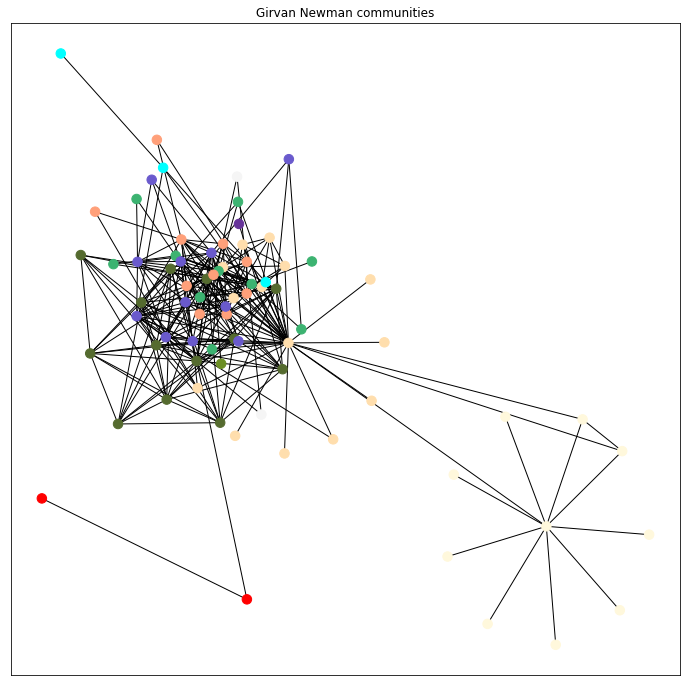

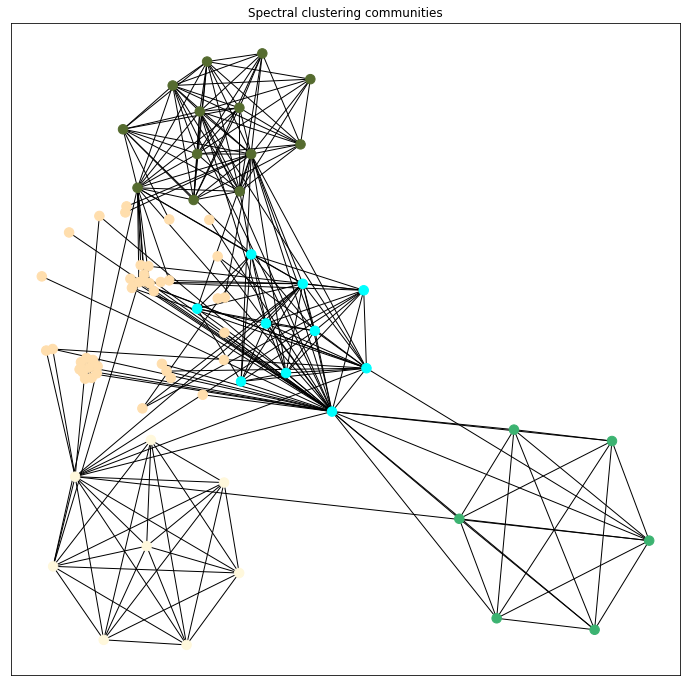

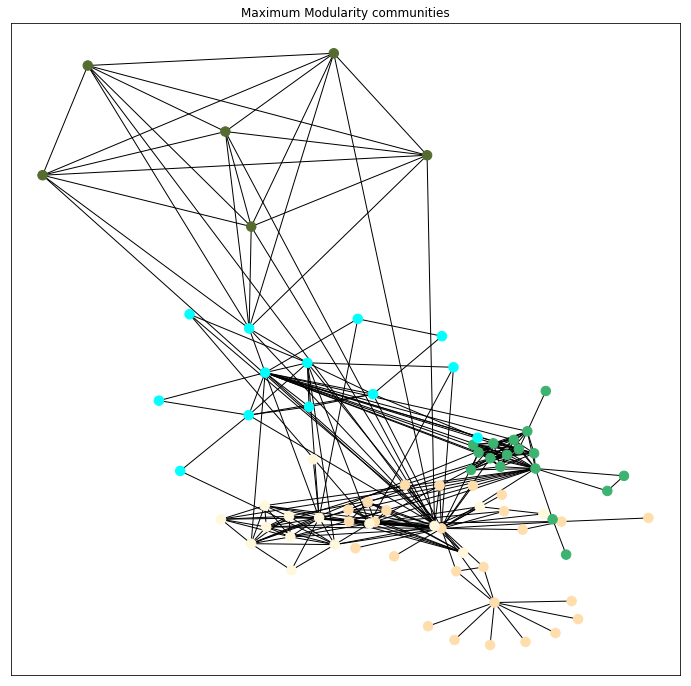

In [65]:
visualizer(new_lesmis)

Παρατηρούμε ότι το μεγαλύτερο modularity εμφανίζεται για την πρώτη μέθοδο που ουσιαστικά κατασκευάζει το δενδρόγραμμα από πάνω προς τα κάτω. Ακολουθεί η άπληστη μέθοδος που κατασκευάζει το δενδρόγραμμα από κάτω προς τα πάνω και τέλος η φασματική. Ανάμεσα στις δύο πρώτες παρατηρούμε μικρή διαφορά. Οπτικά παρατηρούμε διαφορές και φαινομενικά οι φαματική και η άπληστη έχουν καλύτερα αποτελέσματα. Αυτό εν μέρει εξαρτάται και από το πλήθος των κοινοτήτων που έχει διακρίνει η κάθε μέθοδος καθώς οι άλλες δύο διακρίνουν λίγότερες κοινότητες (5). Με βάση την σύγκλιση των δύο τελευταίων μεθόδων ίσως θα ήταν προτιμότερο να καταλήξουμε στο συμπέρασμα ότι στην πραγματικότητα το γράφημα έχει 5 κοινότητες καθώς στην πρώτη μέθοδο που ανακαλύπτει μεγαλύτερο πλήθος κοινοτήτων οπτικά δεν είναι το διακριτές αυτές μεταξύ τους καθώς οι ακμές που υπάχουν μεταξύ κόμβων διαφορετικών κοινοτήτων τους αναγκάζουν να είναι τοπικά κοντά και άρα να μην είναι τόσο διακριτές οι κοινότητες χωρικά όπως στις άλλες δύο μεθόδους.

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

Modularity  Girvan Newman communities :  0.5996290274077896
Modularity  Spectral clustering communities :  0.6032043622544649
Modularity  Maximum Modularity communities :  0.549740665142672


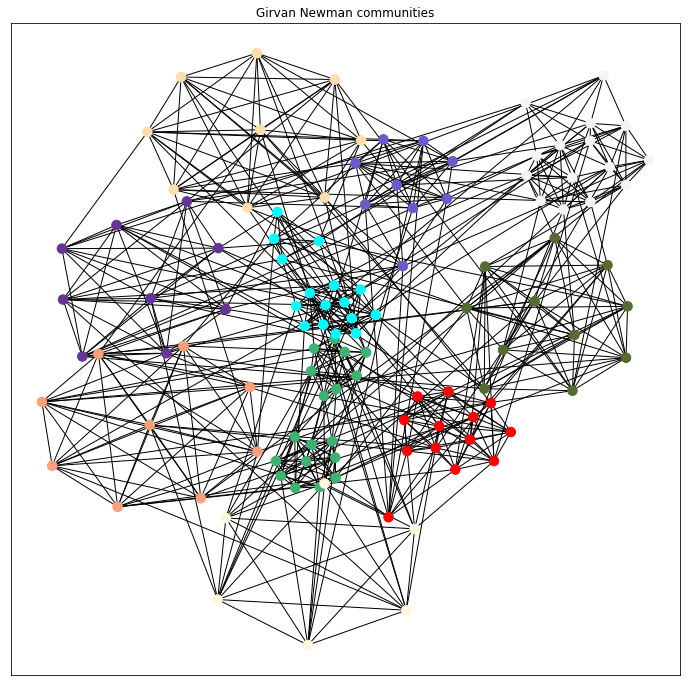

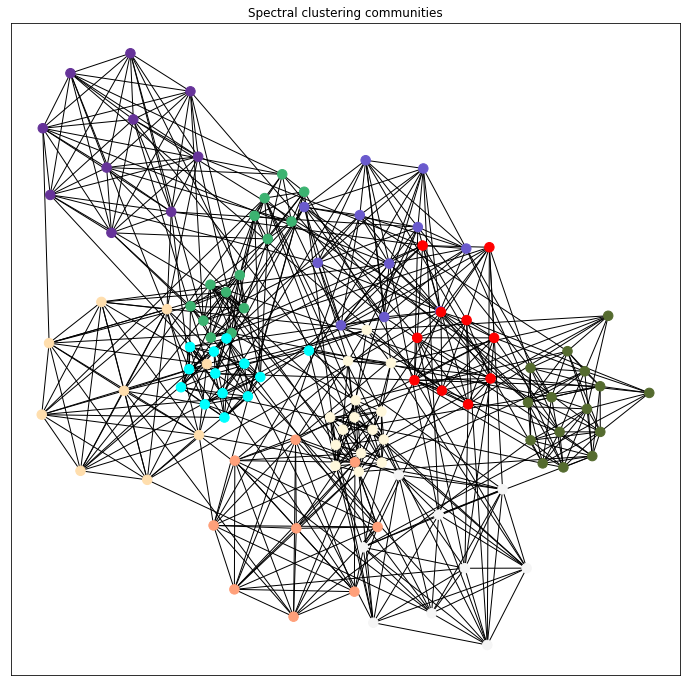

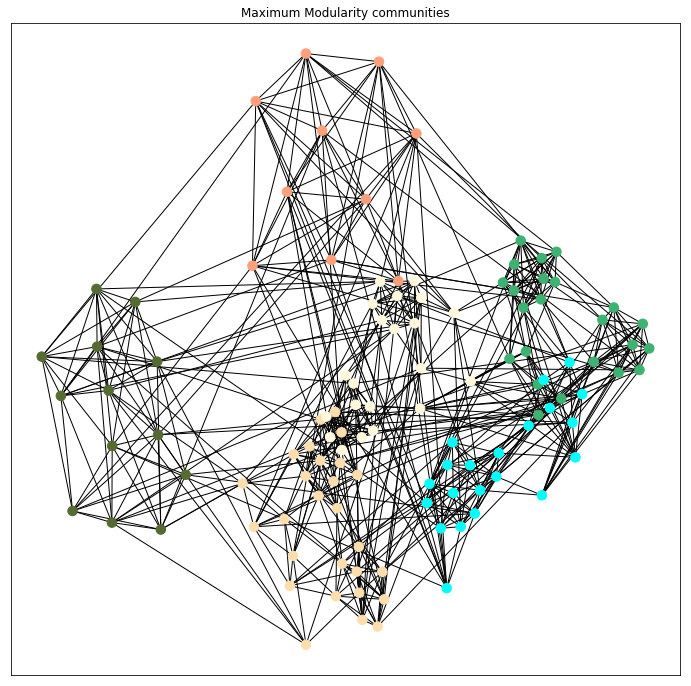

In [66]:
visualizer(new_football)

Στο παραπάνω γράφημα παρατηρούμε σημαντικά καλές επιδόσεις όλων των μεθόδων, σγκεκριμένα οι δύο πρώτες σχεδόν ταυτίζονται σε επίδοση. Ταυτόχρονα οπτικά παρατηρούμε πολύ ικανοποιητικά αποτελέσματα καθώς οι κοινότητες είναι διακριτές μεταξύ τους και χωρικά μπορεί κανείς να τις διακρίνει ακόμη και με γυμνό μάτι χωρίς την χρήση χρωμάτων. Αυτό πιθανώς να οφείλεται και στην φύση του δικτύου όπου οι κοινότητες είναι εύκολο να χωριστούν μεταξύ τους. Οι δύο πρώτες μέθοδοι βρίσκουν με διαφορά +-1 ίδιο πλήθος κοινοτήτων και ο τρίτος λίγο λιγότερες. Τα παραπάνω αποτελέσματα υποδηλώνουν ότι στο δίκτυο είναι εύκολη η διάκριση των μερών του σε κοινότητες και οι εξεταζόμενοι αλγόριθμοι έχουν σημαντικά καλή επίδοση.

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

Modularity  Girvan Newman communities :  0.5193821446936419
Modularity  Spectral clustering communities :  0.24619279300660582
Modularity  Maximum Modularity communities :  0.4954906847039282


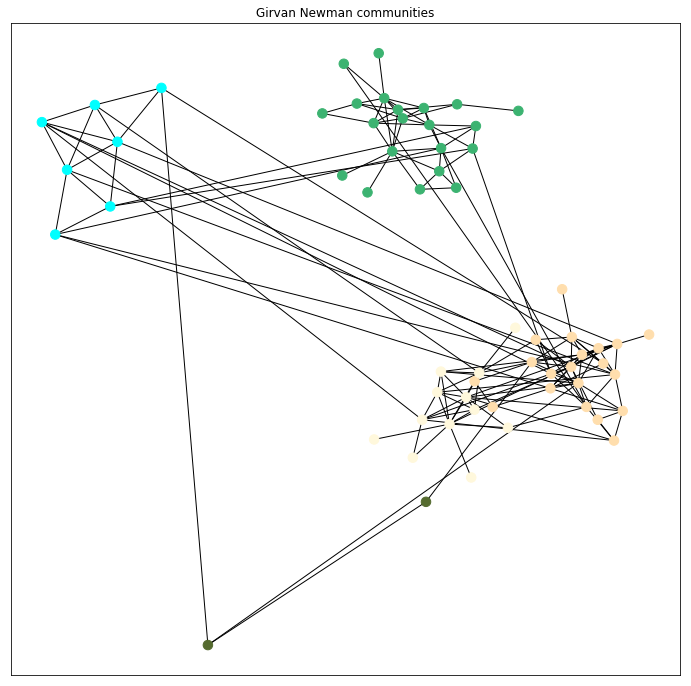

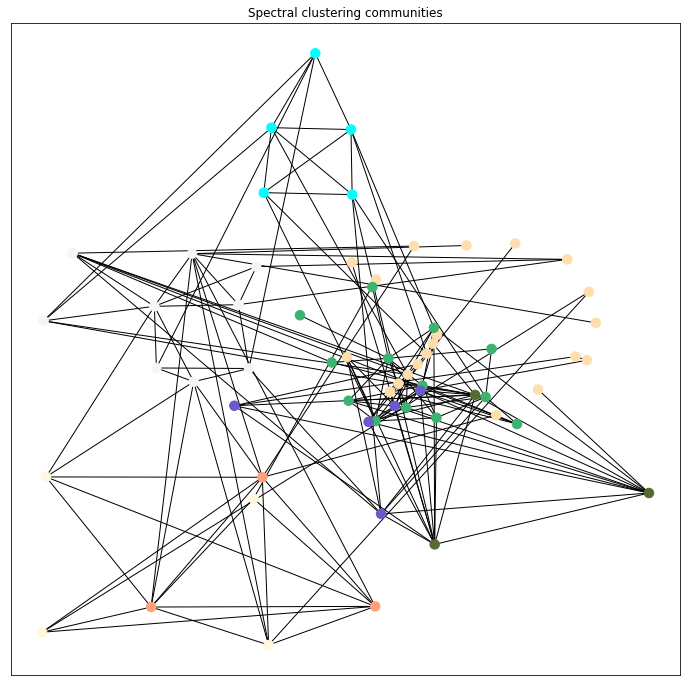

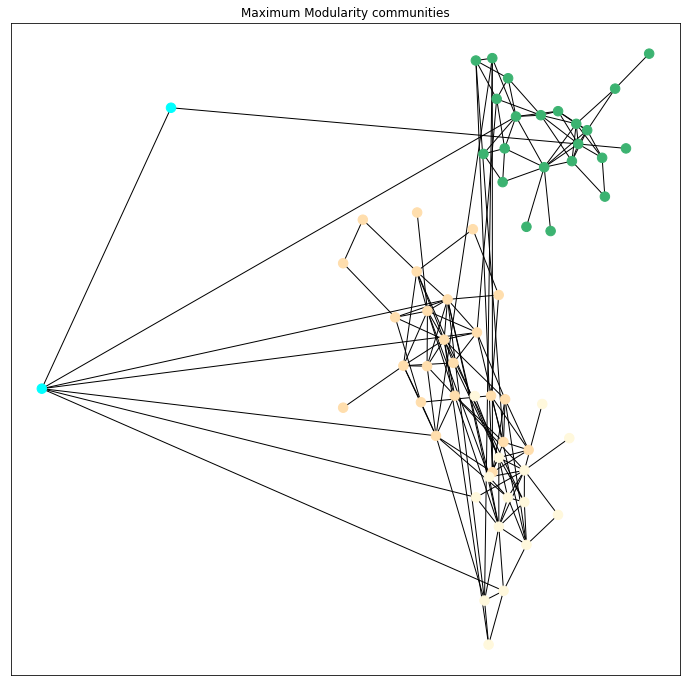

In [67]:
visualizer(new_dolphins)

Παρατηρούμε τα ίδια πράγματα με το γράφημα των ΆΘλιων. Αξιοσημείωτο είναι το γεγονός ότι ο αλγόριθμος με χρήση φάσματος έχει πολύ μικρή επίδοση περιορίζοντας την χρήση του και την ικανότητα του να διακρίνει κοινότητες. Τα παραπάνω αντικατοπτρίζονται και οπτικά καθώς σε κάποια από τα παραπάνω γραφήματα οι κοινότητες είναι διακριτές εύκολα και με γυμνό μάτι ενώ σε άλλα είναι αναμιγμένες μεταξύ τους και οι ακμές ανάμεσα τους είναι σημαντικές σε πλήθος. Αυτό τις κάνει να μην έχουν κατάλληλη χωρική απόσταση μεταξύ τους.

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

Modularity  Girvan Newman communities :  0.8043598615917437
Modularity  Spectral clustering communities :  0.8119377162630119
Modularity  Maximum Modularity communities :  0.7137716262976508


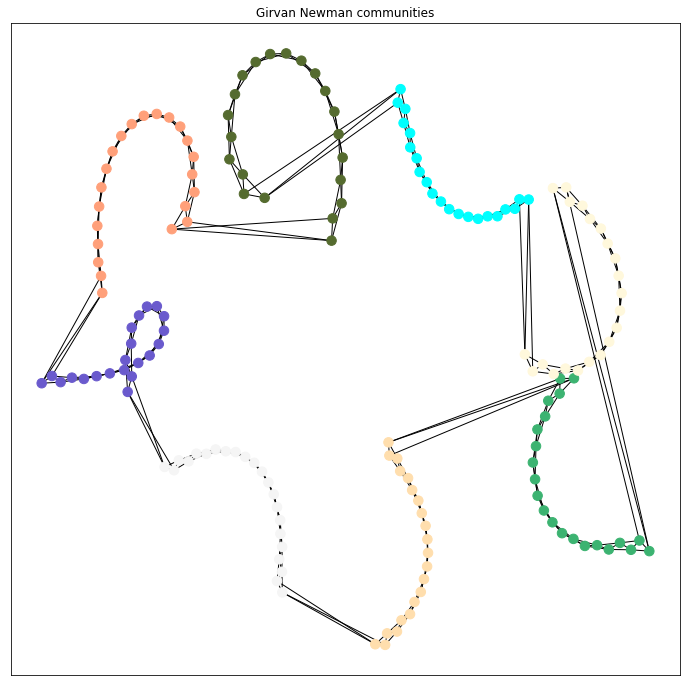

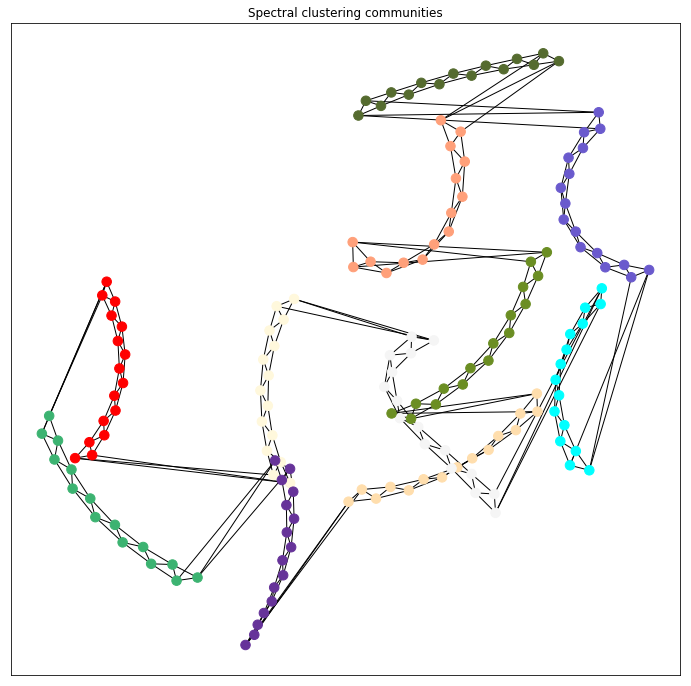

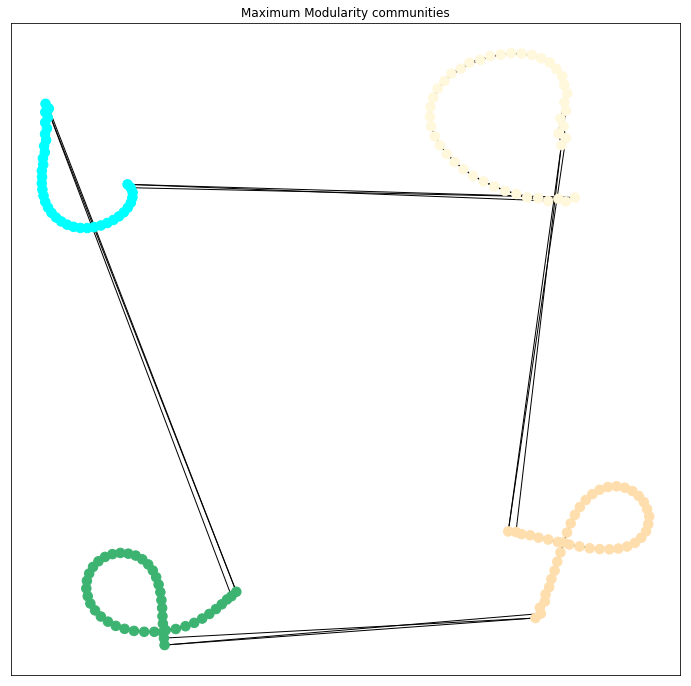

In [68]:
visualizer(REG)

Για το REG λόγω της καθορισμένης διάταξης του είναι πιο εύκολη η δημιουργία και διάκριση κοινοτήτων καθώς και η μεταξύ τους αποστάσεις καθώς αυτές θα είναι καθορισμένες από τη γεωμετρία του γραφήματος. Παρατηρούμε σχεδόν άριστη επίδοση από όλες τις μεθόδους με μικρή πτώση αυτής στην άπληστη μέθοδο. Όλες οι μέθοδοι υπολογίζουν περίπου το ίδιο πλήθος κοινοτήτων, με εξαίρεση την τρίτη. Αυτές οπτικά έχουν σχεδόν βέλτιστο αποτέλεσμα καθώς η διάκριση του είναι εύκολη στον χώρο έτσι όπως έχουν τοποθετηθεί. Η μικρή διαφοροποίηση και η πτώση του modularity για την τρίτη μέθοδο οφείλεται στον τρόπο που κατασκευάζει το δενδρόγραμμα από κάτω προς τα πάνω. Τέλος για όλες παρατηρούμε την κυκλική μορφή της διάταξης των κοινοτήτων, όμοια δηλαδή μορφή με αυτή  που έχει το κυκλικό lattice.

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

Modularity  Girvan Newman communities :  0.21297333333333315
Modularity  Spectral clustering communities :  0.0006373333333333449
Modularity  Maximum Modularity communities :  0.29013511111111545


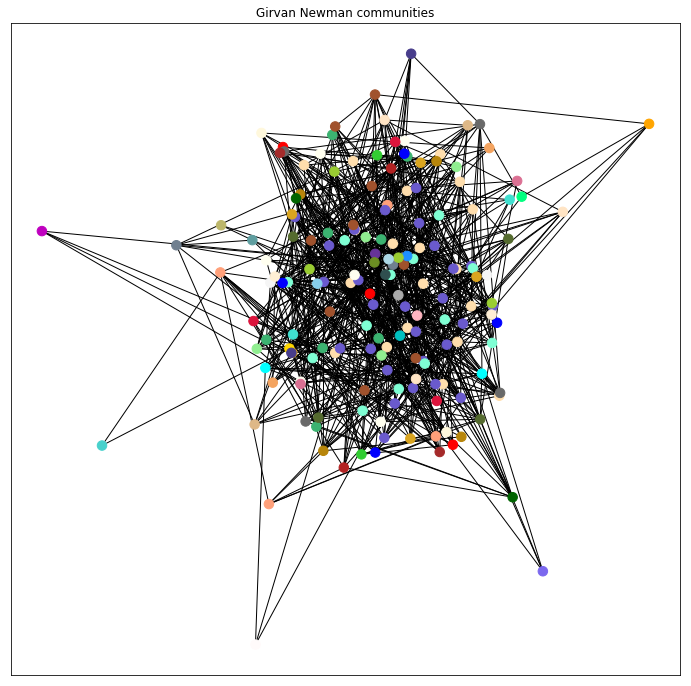

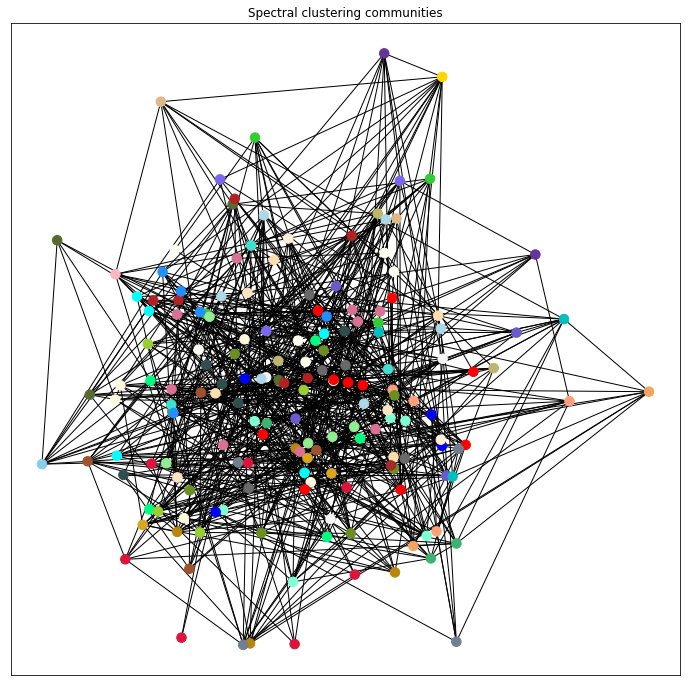

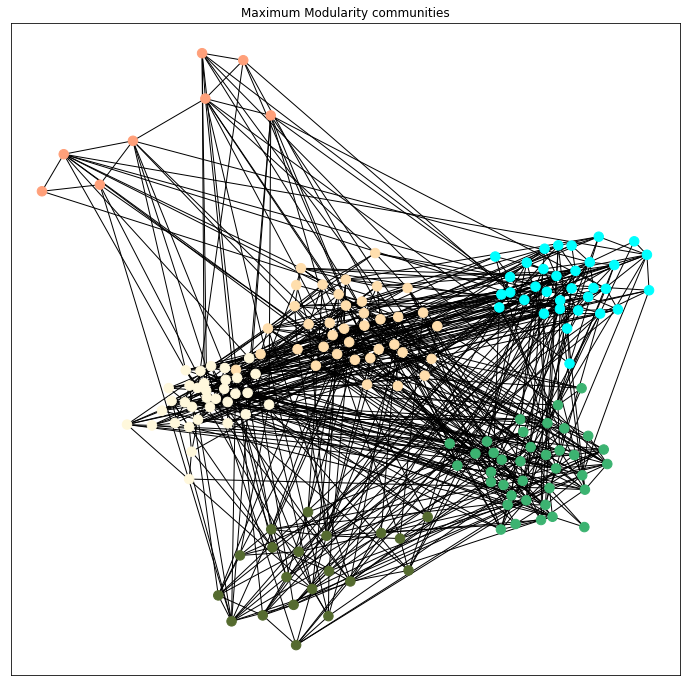

In [69]:
visualizer(RGER)

Τα παραπάνω αποτελέσματα συμφωνούν με την θεωρία και όσα αναμέναμε. Δηλαδή για τυχαίο γράφημα που η σύνδεση των κόμβων του γίνεται τυχαία η πιθανότητα να βρούμε κοινότητες είναι αρκετά μικρή. Αυτό εμαφνίζεται και οπτικά παραπάνω. Το modularity είναι πολύ μικρό για όλες τις προσεγγίσεις και στην φασματική ουσιαστικά μηδενικό. Αξιοσημείωτο είναι να δούμε την αντοχή της άπληστης μεθόδου που καταφέρνει να εντοπίσει κοινότητες ακόμη και σε τυχαίο γράφημα. Αυτό οφείλεται στο τρόπο που φτιάχνει το γράφημα και ξεκινόντας από κάθε κόμβο ξεχωριστά καταφέρνει οπτικά να δώσει ένα αποτέλεσμα που δείχνει διακριτές αν και λίγες στο πλήθος κοινότητες. Παράλληλα βλέπουμε πολλές ακμές μεταξύ κάποιων από αυτές που τις οδηγεί να έρθουν κοντά χωρικά και να μην κάνονυ τόσο εύκολη την διάκριση μεταξύ τους.

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

Modularity  Girvan Newman communities :  0.7044960852076685
Modularity  Spectral clustering communities :  0.6415433556717374
Modularity  Maximum Modularity communities :  0.6517378614694693


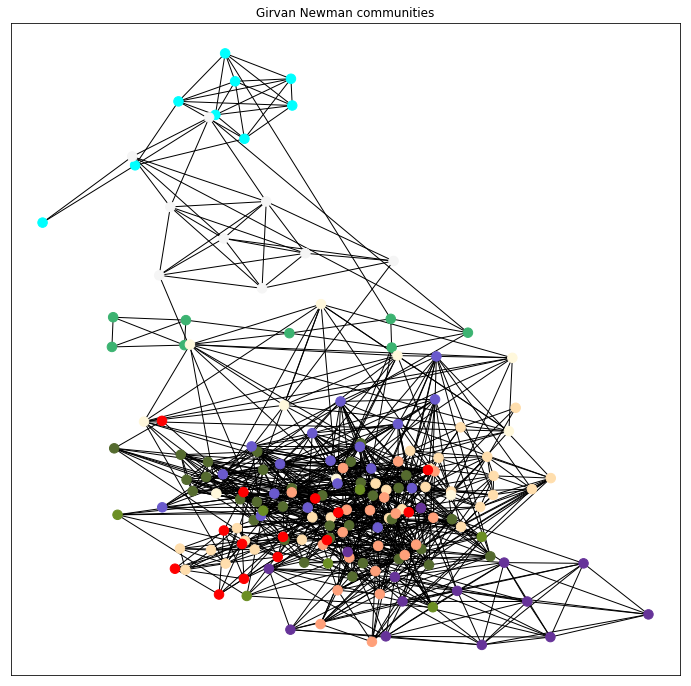

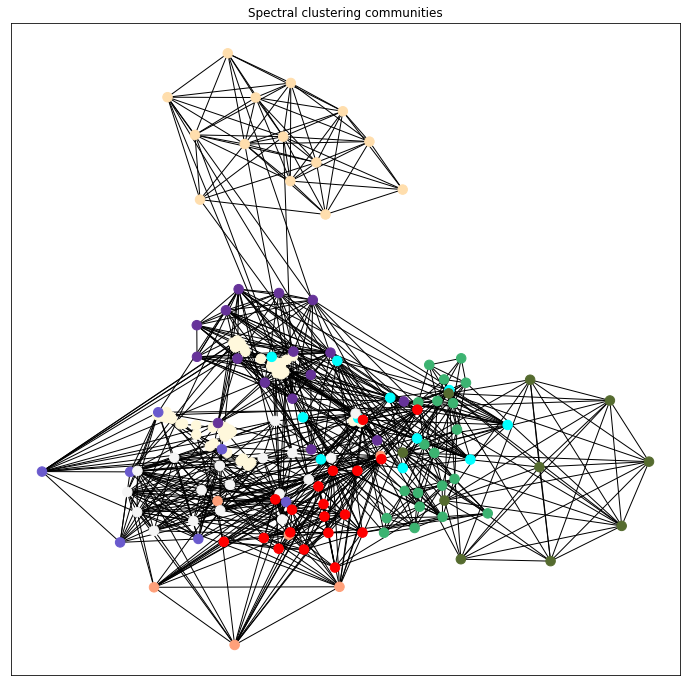

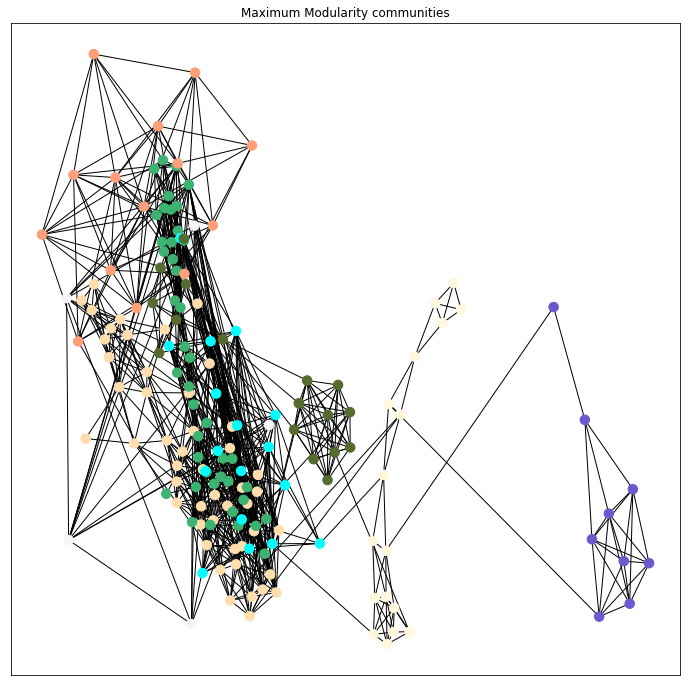

In [70]:
visualizer(RGG)

Σε σχέση με το modularity παρατηρούμε καλές τιμές από όλες τις μεθόδους και με βάση τα προηγούμενα παραδείγματα θα περιμέναμε και καλή οπτικοποίηση. Ωστόσο λόγω της γεωμετρίας που διέπει το γράφημα αυτό δεν έχουν αποτελέσματα που να ανταποκρίνονται στην υποδεικνυόμενη από το modularity ποιότητα. Αναμέναμε να σχηματίζονται κοινότητες γύρω από τους κόμβους καθώς με αυτόν τον τρόπο λαμβάνοντας υπόψη την ακτίνα δημιουργήθηκε το γράφημα. Κάποιες από τις κοινότητες είναι σχετικά διακριτές αλλά οι υπόλοιπες περιπλέκονται μεταξύ τους δημιουργώντας ένα συνοθήλευμα κόμβων χωρίς να δίνουν πληροφορία. Σε όσες από τις μεθόδους φαινομενικά οι κοινότητες είναι διακριτές αυτές βρίσκονται πολύ κοντά λόγω του μεγάλου πλήθους ακμών μεταξύ τους. 
Η πρώτη μέθοδος που κατασκευάζει από πάνω προς τα κάτω το δενδροδιάγραμμα δημιουργεί προβλήματα καθώς όλοι οι κόμβοι θα ήθελαν να σχηματίσουν γύρω τους κοινότητα λόγω της γεωμετριάς αντίθετα ξεκινώντας από κάτω προς τα πάνω αυτή η τάση των κόμβων ικανοποιείται με σκοπό την αύξηση του modularity και σχηματίζονται πιο καθαρές κοινότητες. Αντίστοιχα φασματικά ο αλγόριθμος εκπαιδεύεται ορθότερα πάνω στο γράφημα καθώς αυτό έχει λογική πορεία της δημιουργίας του είναι εύκολο να ανακλυφθούν τα μονοπάτια που θα οδηγήσουν σε αρτιότερες κοινότητες.

<p>g. Οπτικοποίηση κοινοτήτων SW.</p>

Modularity  Girvan Newman communities :  0.616020761245694
Modularity  Spectral clustering communities :  0.3929584775086526
Modularity  Maximum Modularity communities :  0.6121064013840942


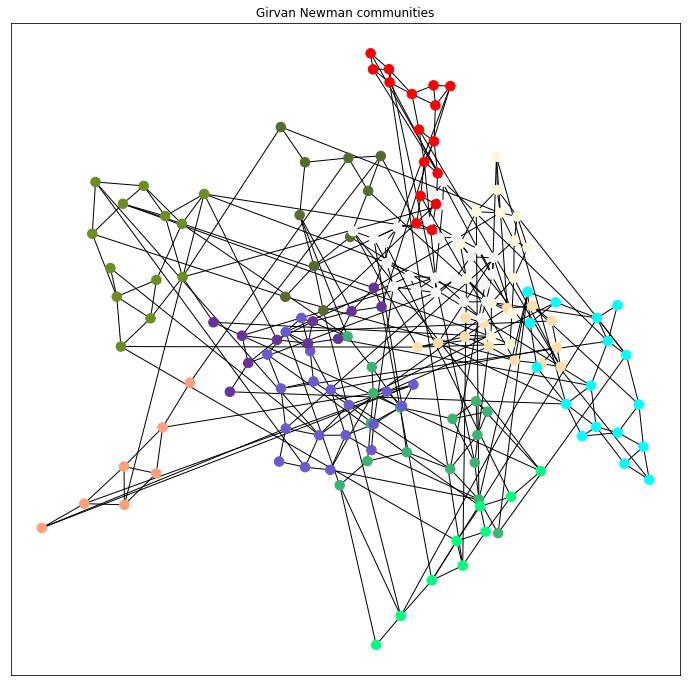

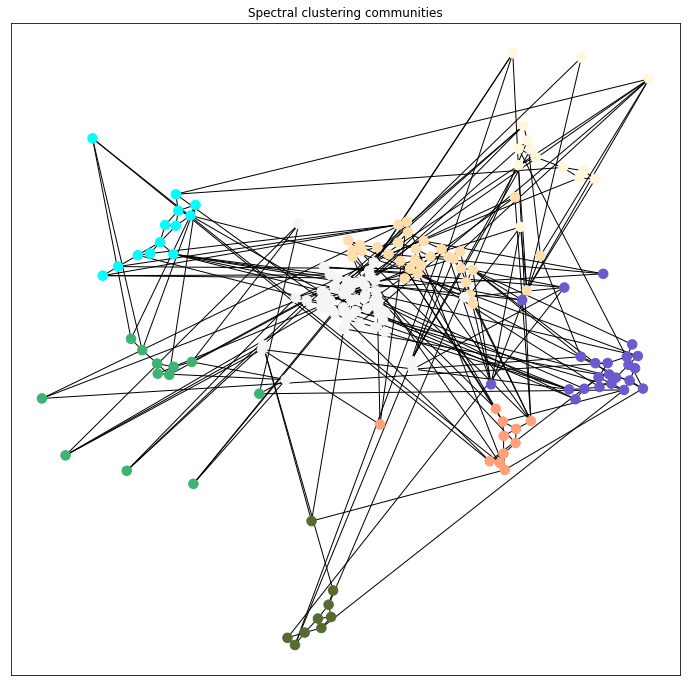

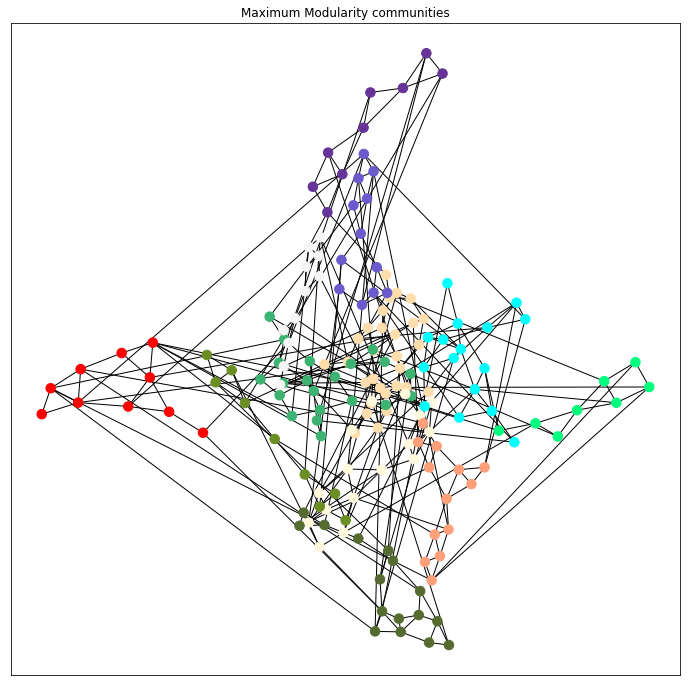

In [71]:
visualizer(SW)

Στα SW γραφήματα θα αναμέναμε να σχηματιστούν κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό καθώς και στο αρχικό γράφημα κάποιος θα μπορούσε εύκολα λόγω της φύσης του να ξεχωρίσει κοινότητες χωρίζοντας τες ανά κόμβο μεγάλου βαθμού. Αν και παρατηρούμε διακυμάνσεις στο modularity μεταξύ των διαφορετικών μεθόδων προσέγγισης οπτικά έχουμε σε όλες τις περιπτώσεις θετικά αποτελέσματα. Μπορούμε επίσης να παρατηρήσουμε ότι στην φασματική μέθοδο κυρίως αλλά και στις άλλες δύο σχηματίστηκαν κάποιες κοινότητες γύρω από τους κόμβους μεγάλου βαθμού χωρίς όμως αυτό να είναι αναγκαστικό, δηλαδή παρατηρούμε και κοινότητες που αποτελούνται μόνο από κόμβους μικρού βαθμού. Επίσης και πάλι παρατηρούμε ότι εκεί που έχουμε περιορισμένη τιμή modularity οι κοινότητες είναι πιο κοντά μεταξύ τους κάνοντας δυσκολότερη την διάκριση χωρίς την χρήση χρωμάτων.

<p>h. Οπτικοποίηση κοινοτήτων SF.</p>

Modularity  Girvan Newman communities :  0.2603380389025919
Modularity  Spectral clustering communities :  0.019631613804616633
Modularity  Maximum Modularity communities :  0.30583289483232956


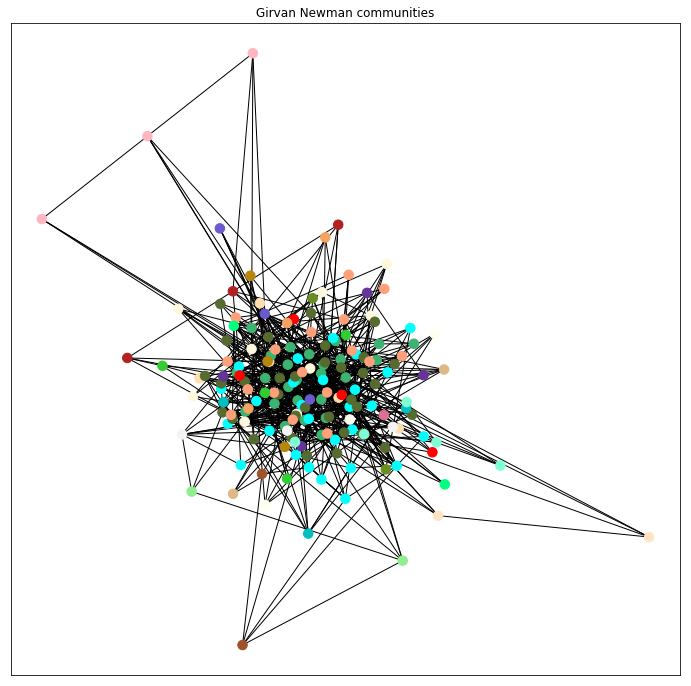

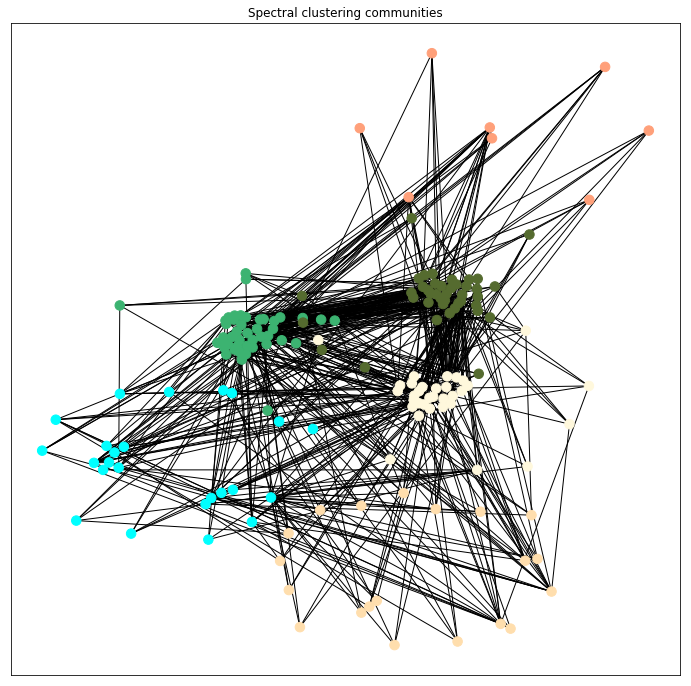

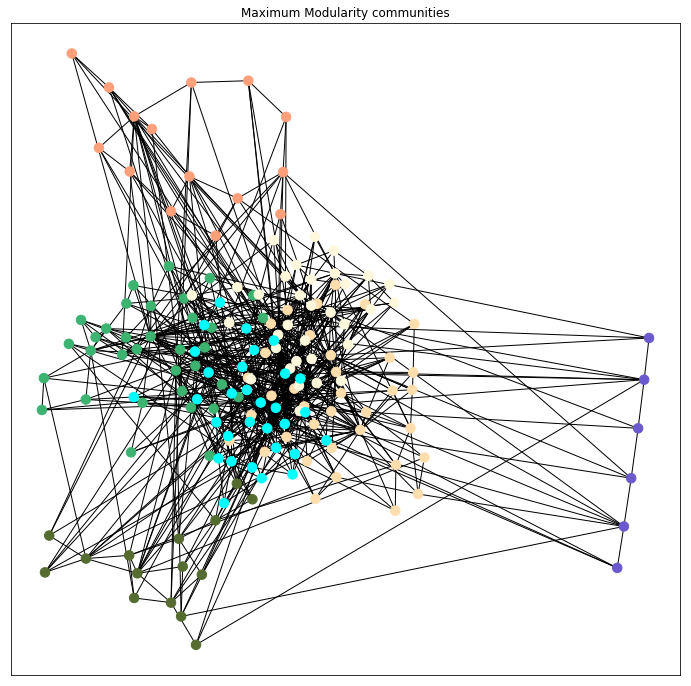

In [72]:
visualizer(SF)

Στο SF γράφημα όπως και στο SW θα περιμέναμε κοινότητες γύρω από τους κόμβους μεγάλου βαθμού και σχετικά εύκολη διάκριση μεταξύ τους. Ωστόσο σε αντίθεση με τα SW παρατηρούμε περιορισμένες τιμές modularity. Όπως και στα γεωμετρικά γραφήματα η πρώτη μέθοδος διαχωρισμού αποτυγχάνει οπτικά να παρουσιάσει τις κοινότητες. Οι υπόλοιπες μέθοδοι δημιουργουν πιο διακριτές κοινότητες αλλά η ποιότητας τους είναι αμφισβητήσιμη λόγω του πλήθους των μεταξύ τους ακμών. Σε πολλές από αυτές ωστόσο παρατηρούμε ότι σχηματίστηκαν γύρω από κόμβους μεγάλου βαθμού που ήταν και το αναμενόμενο για το συγκεκριμένο είδους δικτύου.